In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning (Redes Neurais Multicamadas)

Exemplo da AULA - SÉRIES TEMPORAIS - Prof. Jerônymo Marcondes Pinto <br>
AULA MINISTRADA EM R E TRADUZIDA PARA PYTHON COMO FORMA DE APRENDIZADO.

Comparando previsão de uma Rede Neural Multicamada com uma Árvore de Decisão

### Base Boston Housing

- CRIM: Taxa de criminalidade per capita por região.
- ZN: Proporção de terrenos residenciais divididos em lotes com mais de 25.000 pés quadrados (cerca de 2.322 metros 
quadrados).
- INDUS: Proporção de acres não comerciais por cidade.
- CHAS: indica se o imóvel faz fronteira com o rio Charles (1 se faz fronteira, 0 caso contrário).
- NOX: Concentração de óxidos nítricos (partes por 10 milhões).
- RM: Média de número de quartos por habitação.
- AGE: Proporção de unidades ocupadas pelos proprietários construídas antes de 1940.
- DIS: Distância ponderada até cinco centros de emprego em Boston.
- RAD: Índice de acessibilidade a rodovias radiais.
- TAX: Taxa de imposto sobre propriedades de valor total por $10.000.
- PTRATIO: Razão aluno-professor por cidade.
- B: 1000(Bk - 0.63)^2, onde Bk é a proporção de pessoas de origem afro-americana por cidade.
- LSTAT: Porcentagem de status inferior da população.
- MEDV: Valor mediano das residências ocupadas pelos proprietários em milhares de dólares. (variável de interesse)




In [2]:
df = pd.read_csv(r'bases\BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Separando Base Treino e Teste

In [63]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df.drop('medv', axis=1), 
                                                    df['medv'], 
                                                    random_state=0, 
                                                    test_size=0.20)

In [64]:
len(X_train), len(X_test)

(404, 102)

## Aplicando Modelo Árvore de Decisão

In [65]:
def indicadores (df, y, y_hat):
    n = len(df)
    SQE = sum((y - y_hat)**2)
    QME = SQE/n
    
    SST = sum((y - y.mean())**2)
    QMT = SST/n
    
    R2 = 1-SQE/SST

    print(f'SQE: {SQE}')
    print(f'QME: {QME}')
    print(f'SST: {SST}')
    print(f'QMT: {QMT}')
    print(f'R2: {R2}')

In [66]:
from sklearn.tree import DecisionTreeRegressor

# Aplicando o Modelo
model = DecisionTreeRegressor(max_depth = 30, 
                              ccp_alpha=0.038362, # alpha retirado do exercício de Ensemble
                              min_samples_split=2)
reg_tree_poda = model.fit(X_train, y_train)

### Resultado do modelo na base teste

In [67]:
indicadores(df,y_test, reg_tree_poda.predict(X_test))

SQE: 3263.4562373660424
QME: 6.449518255664115
SST: 8305.700784313725
QMT: 16.41442842749748
R2: 0.6070823736475728


<AxesSubplot:ylabel='medv'>

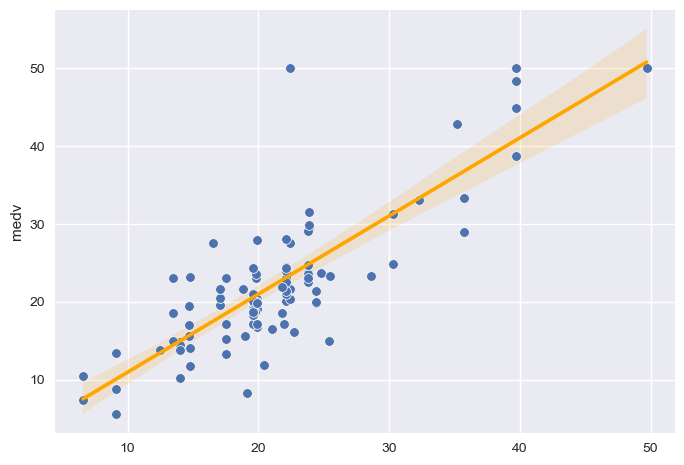

In [68]:
sns.regplot(x=reg_tree_poda.predict(X_test), y=y_test, color='orange')
sns.scatterplot(x=reg_tree_poda.predict(X_test), y=y_test)

## Aplicando Rede Neural

A Rede Neural é muito sensível a valores, por isso é interessante padronizar os dados

In [69]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [70]:
df_std

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_std.drop('medv', axis=1), 
                                                    df_std['medv'], 
                                                    random_state=0, 
                                                    test_size=0.30)

In [72]:
len(X_train), len(X_test)

(354, 152)

Documentação: https://www.tensorflow.org/api_docs/python/tf/keras/activations

Documentação Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

Referência: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [149]:
model = Sequential()
model.add(Dense(512, input_shape=(13,))) # Camada de entrada com 512 neurônios
model.add(Activation('relu')) # Função de ativação ReLU

model.add(Dense(100)) # Primeira camada escondida com 256 neurônios
model.add(Activation('relu'))

model.add(Dense(100)) # Segunda camada escondida com 128 neurônios
model.add(Activation('relu'))

model.add(Dense(100)) # Segunda camada escondida com 128 neurônios
model.add(Activation('relu'))

model.add(Dense(100)) # Segunda camada escondida com 128 neurônios
model.add(Activation('relu'))

model.add(Dense(1)) # Camada de saída com 1 neurônio para prever os valores de X
model.add(Activation('relu'))

In [161]:
model.compile(loss='MSE', optimizer='adam', metrics=['MSE'])
history = model.fit(X_train, y_train, batch_size=354, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 616ms/step - loss: 0.0026 - MSE: 0.0026
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0156 - MSE: 0.0156
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0074 - MSE: 0.0074
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0152 - MSE: 0.0152
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0097 - MSE: 0.0097
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0047 - MSE: 0.0047
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0068 - MSE: 0.0068
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0092 - MSE: 0.0092
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0068 - MSE: 0.0068
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0035 - MSE: 0.0035


Minimum MSE loss: 0.002554703503847122


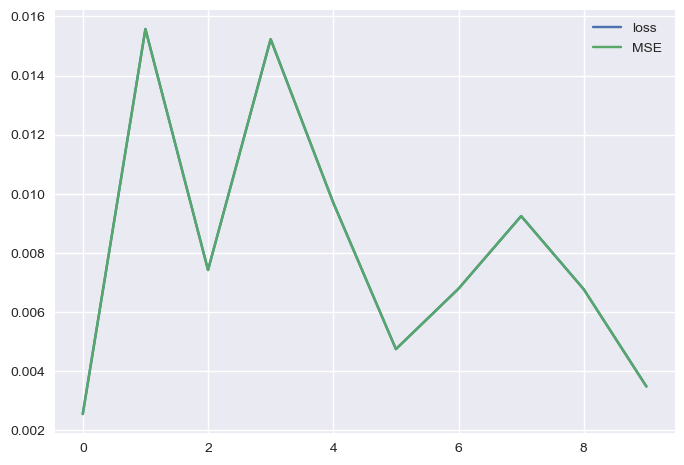

In [162]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'MSE']].plot();
print("Minimum MSE loss: {}".format(history_df['MSE'].min()))

In [163]:
y_hat = pd.DataFrame(model.predict(X_test), columns=['y_hat']).reset_index().drop('index', axis=1)

resultados = pd.DataFrame()
resultados['y_test'] = y_test.reset_index().drop('index', axis=1)
resultados['y_hat'] = y_hat
resultados

5/5 [==============================] - 0s 868us/step


,y_test,y_hat
0,0.391111,0.408102
1,1.000000,0.477521
2,0.400000,0.449902
3,0.073333,0.161760
4,0.360000,0.312775
...,...,...
147,0.693333,0.552872
148,0.133333,0.150303
149,0.048889,0.137691
150,0.395556,0.441676


## Volta os Valores à escala original

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) <br>
X_scaled = X_std * (max - min) + min

In [164]:
resultados_reais = pd.DataFrame()
resultados_reais['y_test'] = resultados['y_test'] * (max(df['medv']) - min(df['medv'])) + min(df['medv']) 
resultados_reais['y_hat'] = resultados['y_hat'] * (max(df['medv']) - min(df['medv'])) + min(df['medv']) 
resultados_reais

,y_test,y_hat
0,22.6,23.364605
1,50.0,26.488447
2,23.0,25.245573
3,8.3,12.279213
4,21.2,19.074890
...,...,...
147,36.2,29.879259
148,11.0,11.763649
149,7.2,11.196106
150,22.8,24.875431


In [165]:
indicadores(df, resultados_reais['y_test'], resultados_reais['y_hat'])

SQE: 2431.7149651555055
QME: 4.80576080070258
SST: 12656.356249999992
QMT: 25.012561758893263
R2: 0.807866109556176


<AxesSubplot:xlabel='y_hat', ylabel='y_test'>

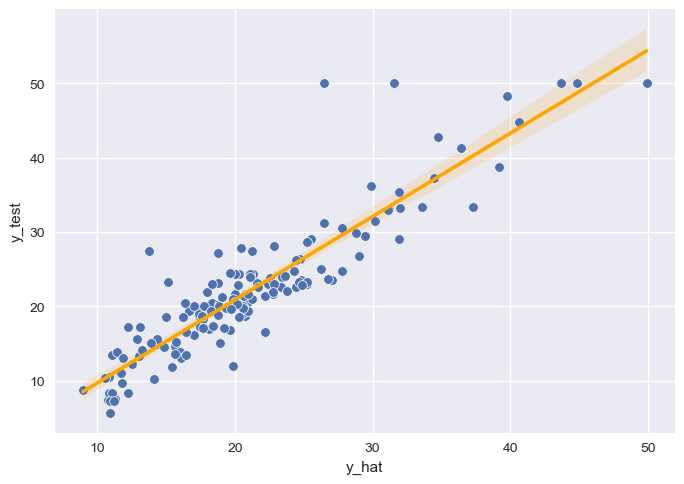

In [166]:
sns.regplot(x='y_hat', y='y_test', color='orange', data=resultados_reais)
sns.scatterplot(x='y_hat', y='y_test', data=resultados_reais)

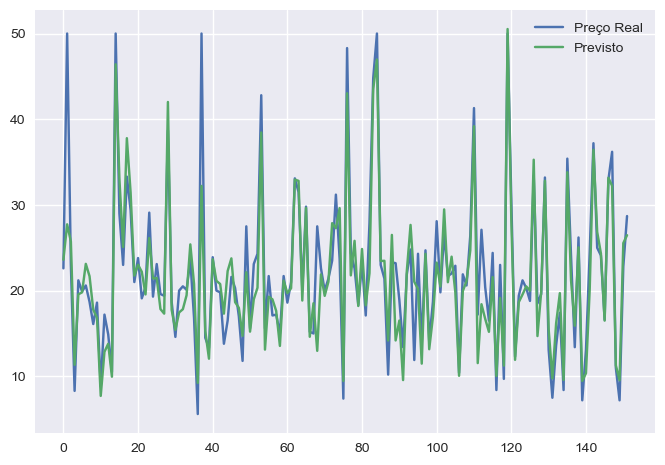

In [155]:
plt.style.use('seaborn')
plt.plot('y_test' ,data=resultados_reais, label = 'Preço Real')
plt.plot('y_hat' ,data=resultados_reais, label = 'Previsto')
plt.legend()